En este notebook analizare los datos de los recursos para identificar si es estacionaria y si se pueden aplicar modelos de medias moviles o ARDL


In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Fetch data
url = "http://127.0.0.1:8000/api/v1/data/?table_name=precios_materiales&limit=1000"

try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    print(f"✓ Successfully fetched {len(data['data'])} records")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    raise


✓ Successfully fetched 190 records


In [16]:
# Convert to Data Frame
df = pd.DataFrame(data['data'])


#Convert date to date of Dataframe
df['date'] = pd.to_datetime(df['date'])

# Df sort by date
df = df.sort_values('date')

print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    190 non-null    int64         
 1   date                  190 non-null    datetime64[ns]
 2   year                  190 non-null    int64         
 3   scrap                 190 non-null    float64       
 4   gas                   190 non-null    float64       
 5   rebar                 190 non-null    float64       
 6   hrcc1                 190 non-null    float64       
 7   scrap_mxn             190 non-null    float64       
 8   gas_mxn               190 non-null    float64       
 9   rebar_mxn             190 non-null    float64       
 10  hrcc1_mxn             190 non-null    float64       
 11  tipo_de_cambio        190 non-null    float64       
 12  varilla_distribuidor  190 non-null    float64       
 13  varilla_credito     


CORRELATION MATRIX


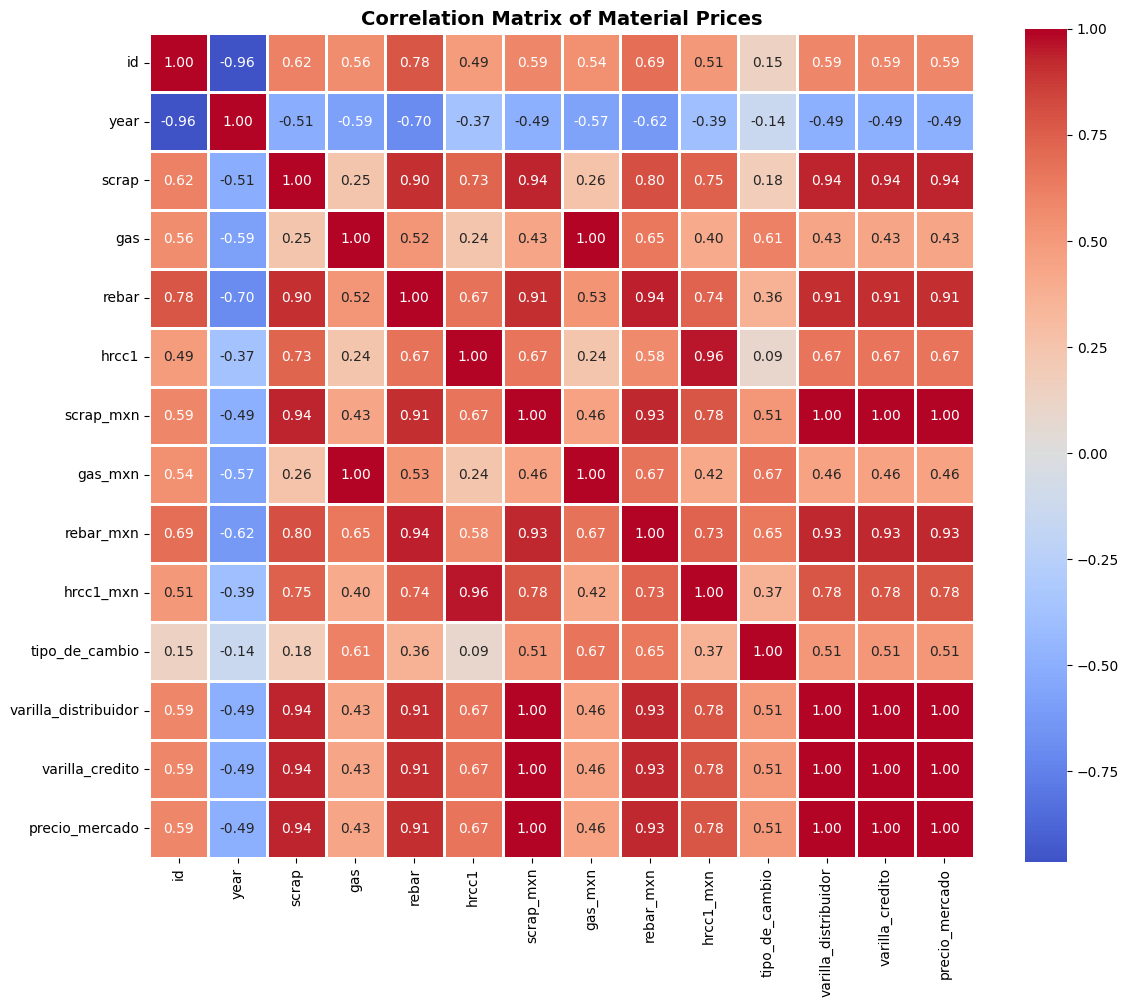

In [19]:
print("\n" + "="*50)
print("CORRELATION MATRIX")
print("="*50)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Material Prices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()